
### Notebook Outline
* Functions used in shuffle investigation
* Test shuffle functionality with debug output
* Shuffle Investigation

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import chisquare


### Functions used in shuffle investigation

In [2]:
#Returns an integer between 0 and n (inclusive), the number of cards to split into the right sub-deck
#This implements the Gilbert-Shannon-Reeds model
#https://en.wikipedia.org/wiki/Gilbert%E2%80%93Shannon%E2%80%93Reeds_model

def get_random_number_for_right_deck(n):
    
    w = [comb(n,i)/math.pow(2,n) for i in range(0,n+1)]
    return random.choices(list(range(0,n+1)), w, k=1)[0]


In [3]:
#Returns `True` if we should drop a card from the right sub-deck, and `False` if we should drop it from the left
#This implements the Gilbert-Shannon-Reeds model
#https://en.wikipedia.org/wiki/Gilbert%E2%80%93Shannon%E2%80%93Reeds_model

def should_drop_from_right_deck(n_left, n_right):
    
    r = random.random()
    x = n_right/float(n_right+n_left)

    if r <= x:
        return True
    else:
        return False
    

In [4]:
#Returns a shuffled list, given an input list

#Algorithm from problem description:
#We randomly drop a card from the bottom of one of the sub-decks onto our 
#shuffled pile until one sub-deck runs out; 
#the remaining cards from the un-exhausted sub-deck are dropped on top.
#Assume we do not want to destroy the input sequence in the process.  

#Note: sticky_split and sticky_drop implement small changes to the model for the investigation
#sticky_split: Adds n cards to the right deck in the split
#sticky_drop: Introduces a probability r of not actually dropping a card onto the shuffled deck

def shuffle(int_seq, debug = False, sticky_split = 0, sticky_drop = 0):
    
    shuffled_seq = []

    #Find number of cards in right deck
    num_in_right = get_random_number_for_right_deck(len(int_seq)) 
    if sticky_split > 0:
        num_in_right  = min(num_in_right + sticky_split, len(int_seq))
        
    split_idx = len(int_seq) - num_in_right
    if(debug==True):
        print("number of cards in right deck")
        print(num_in_right) 
          
    #if all the cards are in one deck, return the original sequence
    if split_idx == 0 or split_idx==len(int_seq):
        print("all cards in one deck")
        return int_seq
    
    left_deck_start_idx = 0
    left_deck_end_idx = split_idx-1
    right_deck_start_idx = split_idx
    right_deck_end_idx = len(int_seq)-1
    
    #while there are cards left in both decks
    while (right_deck_end_idx - right_deck_start_idx+1)>0 and (left_deck_end_idx - left_deck_start_idx+1)>0:
        
        if(debug==True):
            print("current_state")
            print(int_seq[left_deck_start_idx:left_deck_end_idx+1])
            print(int_seq[right_deck_start_idx:right_deck_end_idx+1])
        
        #randomly choose which deck to choose from
        n_right = right_deck_end_idx - right_deck_start_idx +1
        n_left = left_deck_end_idx - left_deck_start_idx+1
       
        #choose a random prob of a sticky_drop
        r = random.random()
            
        if should_drop_from_right_deck(n_left, n_right)==True:
            
            #drop the bottom card from the right deck on the pile
            if(debug==True):
                print("dropped right" )
            
            if r > sticky_drop:
                shuffled_seq.insert(0,int_seq[right_deck_end_idx])
                right_deck_end_idx -= 1
            
        else:
            
            #drop the bottom card from the left deck on the pile
            if(debug==True):
                print("dropped left" )
           
            if r > sticky_drop:
                shuffled_seq.insert(0,int_seq[left_deck_end_idx])
                left_deck_end_idx -= 1
         
        if(debug==True):
            print("shuffled_seq")
            print(shuffled_seq)
        
    #Check which deck ran out and drop other deck on top    
    if(right_deck_end_idx - right_deck_start_idx+1)==0:
        #drop left on top
        for i in range(left_deck_end_idx, left_deck_start_idx-1, -1):
            shuffled_seq.insert(0,int_seq[i])
    else:
        #drop right on top
        for i in range(right_deck_end_idx, right_deck_start_idx-1, -1):
            shuffled_seq.insert(0,int_seq[i])
        
    #return a shuffled int_seq
    return shuffled_seq

In [5]:
#Repeat the shuffle function on the same sequence n times
def shuffle_n_times(seq, n, debug, sticky_split = 0, sticky_drop = 0):
    
    for i in range(0,n):
        seq = shuffle(seq, debug, sticky_split, sticky_drop)
        
    return seq

In [6]:
#for each spot in the deck [1 - len of deck], check if it has a uniform distribution of values over trials
#p > .05 we accept the null hypothesis that elements in this spot have a uniform distribution

#return percent of spots in the deck that are uniform

def evaluate_uniformity(data, num_cards, num_trials):

    u = []
    for spot in range(0, num_cards):
        counts,edges = np.histogram([data[idx][spot] for idx in range(0,num_trials)], bins=list(range(0,num_cards+2)))
        u.append(chisquare(list(counts)[1:]).pvalue)
    
    return sum(x > .05 for x in u)/num_cards

### Test shuffle functionality with debug output

In [7]:
num_cards = 10
orig_seq = list(range(1,num_cards+1))
print(orig_seq)
print(shuffle(orig_seq, debug=True))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
number of cards in right deck
6
current_state
[1, 2, 3, 4]
[5, 6, 7, 8, 9, 10]
dropped left
shuffled_seq
[4]
current_state
[1, 2, 3]
[5, 6, 7, 8, 9, 10]
dropped right
shuffled_seq
[10, 4]
current_state
[1, 2, 3]
[5, 6, 7, 8, 9]
dropped left
shuffled_seq
[3, 10, 4]
current_state
[1, 2]
[5, 6, 7, 8, 9]
dropped right
shuffled_seq
[9, 3, 10, 4]
current_state
[1, 2]
[5, 6, 7, 8]
dropped right
shuffled_seq
[8, 9, 3, 10, 4]
current_state
[1, 2]
[5, 6, 7]
dropped left
shuffled_seq
[2, 8, 9, 3, 10, 4]
current_state
[1]
[5, 6, 7]
dropped right
shuffled_seq
[7, 2, 8, 9, 3, 10, 4]
current_state
[1]
[5, 6]
dropped right
shuffled_seq
[6, 7, 2, 8, 9, 3, 10, 4]
current_state
[1]
[5]
dropped right
shuffled_seq
[5, 6, 7, 2, 8, 9, 3, 10, 4]
[1, 5, 6, 7, 2, 8, 9, 3, 10, 4]


### Shuffle Investigation

#### How many shuffles are necessary to fully randomize an ordered deck of size 26? 52? 104?

In [8]:
# For 1000 trials each, shuffles a deck 1 to n times and reports how shuffled the results are for
# each number of shuffles

# "Shuffled" is evaluated by looking at each spot [1 - len of deck] in the deck.
# We expect each spot to have a uniform distribution of values from the deck 

# This code checks if the values at each spot over all trials have a uniform distribution using a
# chi-square test.  If p > .05 we accept the null hypothesis that elements in this spot have a uniform distribution.
# This function calculates the percentage of spots in a deck that have a uniform distribution of values over trials 
# for each number of shuffles tested, and plots these results 

def investigate(num_cards, sticky_split = 0, sticky_drop = 0):

    num_trials = 1000
    orig_seq = list(range(1,num_cards+1))
    percent_spots_uniform = []

    for num_shuffles in range(1,16):
        
        #print(num_shuffles)
        d = []
        
        for i in range(0,num_trials):
            d.append(shuffle_n_times(orig_seq, num_shuffles, False,sticky_split, sticky_drop))
    
        percent_spots_uniform.append(evaluate_uniformity(d, num_cards, num_trials))
        
    plt.plot(range(1,len(percent_spots_uniform)+1), percent_spots_uniform)
    plt.xlabel('Number of shuffles')
    plt.ylabel('Percentage uniform spots')
    plt.show()

Results:  
  
Here I ran the above investigation for a deck of 26,52 and 104 cards. Each plot shows the percentage of uniform spots for each number of shuffles  

For all three deck sizes, it takes around 6-7 shuffles to fully randomize the deck.  These plots show that the percentage of uniform spots increases from 1 through 6-7 shuffles, but then remains at a similar level with increasing numbers of shuffles.  

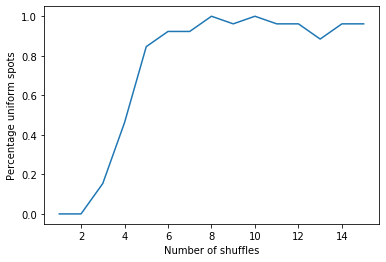

In [20]:
investigate(26,0,0)

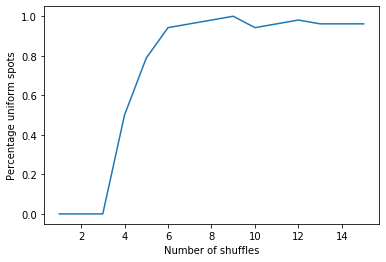

In [10]:
investigate(52,0,0)

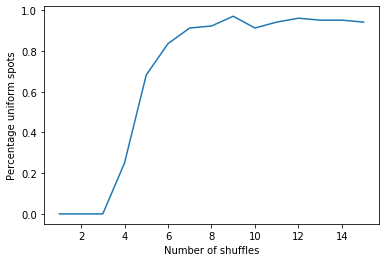

In [11]:
investigate(104,0,0)

#### Do you think these findings are robust to small changes to the shuffling model?

To test this I added two small changes to the model . 

1. sticky_split: Adds n cards to the right deck in the split
2. sticky_drop: Introduces a probability r of not actually dropping a card onto the shuffled deck  

These are integrated into the shuffle() function above.  

It looks likes the finding that about 6-7 shuffles randomizes the deck is robust to these two small changes to the model.  

Below are the plots for sticky_split values of 1,2 and 10.  For the small values of 1 and 2, these plots look similar to the results above, where the percentage of uniform spots does not continue to increase after 6-7 shuffles.  For a larger value of 10, the percentage of uniform spots continues to increase through 10 shuffles, which makes sense since adding 10 cards to the split is a much bigger change to the model.  

Also below are the plots for sticky_drop values of .01, .05, .1 and .33.  Missing a card drop 1,5 or 10 percent of the time does not change the number of shuffles required to randomize the deck, but the plots for the bigger value of 33 percent shows that the percentage of uniform spots continues to increase through 8 shuffles.


#### Sticky_split

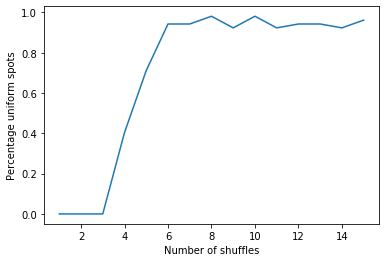

In [12]:
investigate(52, 1, 0)

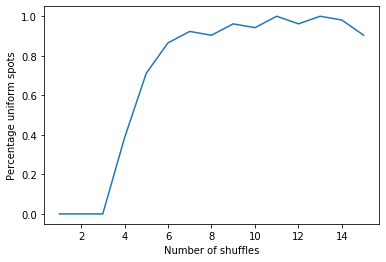

In [13]:
investigate(52, 2, 0)

all cards in one deck


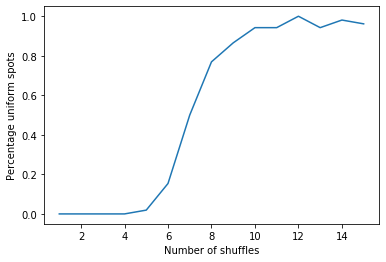

In [15]:
investigate(52, 10, 0)

#### Sticky_drop

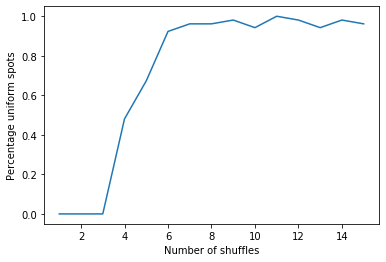

In [16]:
investigate(52, 0, .01)

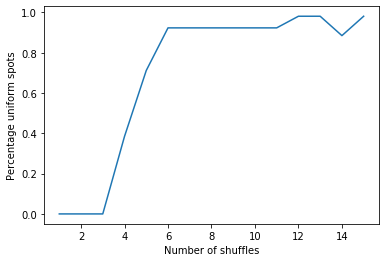

In [17]:
investigate(52, 0, .05)

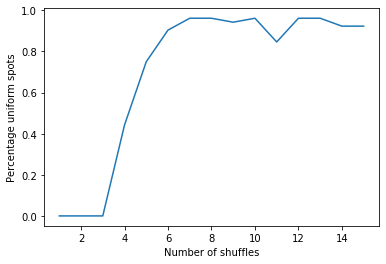

In [18]:
investigate(52, 0, .1)

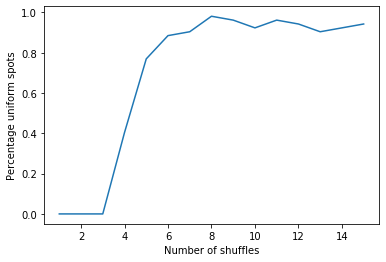

In [19]:
investigate(52, 0, .33)